16000
53120
[-0.00186157 -0.00189209 -0.0018158  ...  0.0007782   0.00038147
  0.00012207]


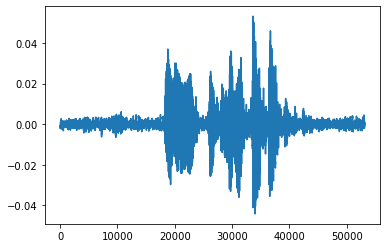

In [70]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pywt
import soundfile as sf 
import IPython.display 

signal,fs=sf.read('speech_utterance.wav')
print(fs)
print(len(signal))
print(signal)
plt.plot(signal)
IPython.display.Audio(signal,rate=16000)

[-0.03502728 -0.03560149 -0.03416595 ...  0.01464255  0.00717772
  0.00229687]
16000
53120
samples/millisecond   16.0
samples/[%dms]frame   20 320
number of frames   166.0
samples/millisecond   16.0
samples/[%dms]frame   30 480
number of frames   110.66666666666667
samples/millisecond   16.0
samples/[%dms]frame   40 640
number of frames   83.0
samples/millisecond   16.0
samples/[%dms]frame   50 800
number of frames   66.4


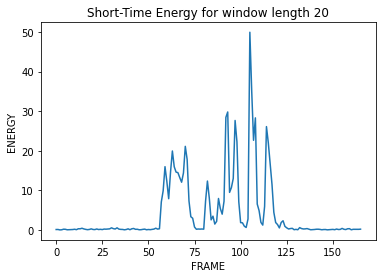

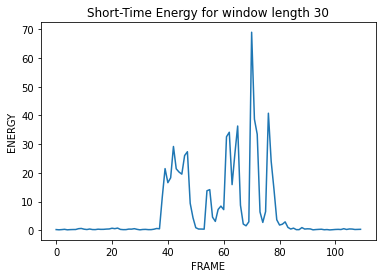

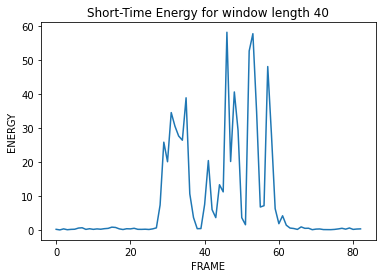

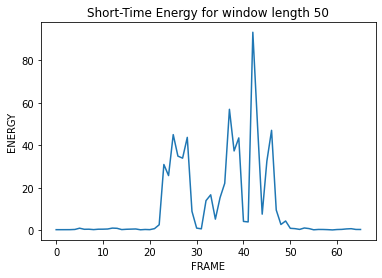

In [71]:
signal=signal/ max(abs(signal))
print(signal)
print(fs)
print(len(signal))

sampsPerMilli = (fs / 1000)
millisPerFrame = 20
counter=0
while millisPerFrame <= 50:
    sampsPerFrame= int(sampsPerMilli * millisPerFrame)
    nFrames = (len(signal) / sampsPerFrame) # number of non-overlapping _full_ frames
    print ('samples/millisecond  ', sampsPerMilli)
    print ('samples/[%dms]frame  ', millisPerFrame, sampsPerFrame)
    print ('number of frames  ', nFrames)
    STEs = []                                      # list of short-time energies
    for k in range(int(nFrames)):
        startIdx = k * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        window = np.zeros(signal.shape)#διμιουργούμε μηδενικό πήνακα ιδιων δυαστάσεων με τον signal
        window[startIdx:stopIdx] = 1       # dimiourgoume to mikos pou 8eloume (n-m)
        STE = sum((signal ** 2) * window )
        STEs.append(STE)
    plt.figure(counter)
    plt.plot(STEs)
    plt.title('Short-Time Energy for window length %i' %millisPerFrame)
    plt.ylabel('ENERGY')
    plt.xlabel('FRAME')
    millisPerFrame+=10
    counter+=1


53120
samples/millisecond  16.0
samples/[%dms]frame  20 320
number of frames     166.0
samples/millisecond  16.0
samples/[%dms]frame  30 480
number of frames     110.66666666666667
samples/millisecond  16.0
samples/[%dms]frame  40 640
number of frames     83.0
samples/millisecond  16.0
samples/[%dms]frame  50 800
number of frames     66.4


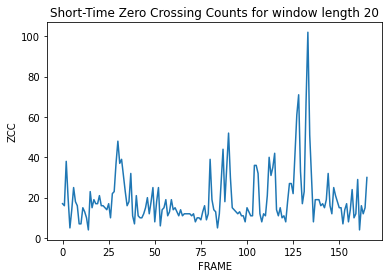

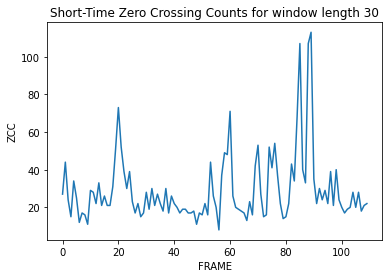

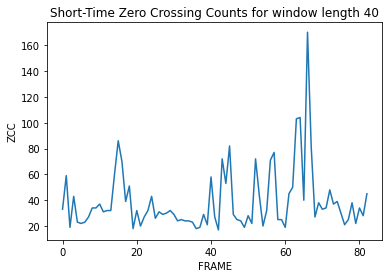

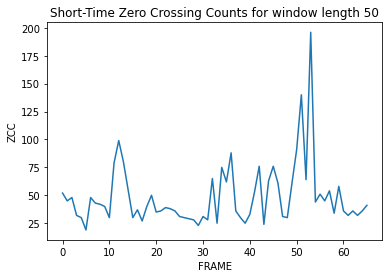

In [69]:
import IPython.display 
import soundfile as sf
signal,fs=sf.read("speech_utterance.wav")
signal=signal/ max(abs(signal))
print(len(signal))

sampsPerMilli = (fs / 1000)
millisPerFrame = 20
counter=0
while millisPerFrame <= 50:
    sampsPerFrame= int(sampsPerMilli * millisPerFrame)
    nFrames = (len(signal) / sampsPerFrame)       # number of non-overlapping _full_ frames
    print ('samples/millisecond ', sampsPerMilli)
    print ('samples/[%dms]frame ', millisPerFrame, sampsPerFrame)
    print ('number of frames    ', nFrames)
    DC = np.mean(signal)
    newSignal = signal - DC
    ZCCs = []                                      # list of short-time zero crossing counts
    for i in range(int(nFrames)):
        startIdx = i * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        s = newSignal[startIdx:stopIdx]            # s is the frame, named to correspond to the equation
        ZCC = 0
        for k in range(1, len(s)):
            ZCC += 0.5 * abs(np.sign(s[k]) - np.sign(s[k - 1]))
        ZCCs.append(ZCC)
    plt.figure(counter)
    plt.plot(ZCCs)
    plt.title('Short-Time Zero Crossing Counts for window length %i' %millisPerFrame)
    plt.ylabel('ZCC')
    plt.xlabel('FRAME')
    millisPerFrame+=10
    counter+=1
